In [104]:
import pandas as pd

In [105]:
from statsmodels.tsa.stattools import adfuller

In [106]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [107]:
import statsmodels.api as sm

In [108]:
import statsmodels.api as sm

In [109]:
import pmdarima

In [110]:
from pmdarima.arima import auto_arima

In [111]:
df=pd.read_csv(r'C:\Users\ZarasAndreas\Documents\Documents\Courses Taught by Me\Forecasting Course_FINAL\FINAL\Course Presentations\Python\airline_data_mult_wes - Python.csv')

In [ ]:
df

In [112]:
df["Date"]=pd.to_datetime(df["Date"])

In [113]:
df=df.set_index("Date")
df

,Yt
Date,
1949-01-01,112
1949-01-02,118
1949-01-03,132
1949-01-04,129
1949-01-05,121
...,...
1956-01-08,405
1956-01-09,355
1956-01-10,306


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1949-01-01 to 1956-01-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Yt      96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [115]:
split=round(len(df)*0.75)
train=df.iloc[:split,:]
validation=df.iloc[split:,:]
validation
train

,Yt
Date,
1949-01-01,112
1949-01-02,118
1949-01-03,132
1949-01-04,129
1949-01-05,121
...,...
1954-01-08,293
1954-01-09,259
1954-01-10,229


<AxesSubplot:xlabel='Date'>

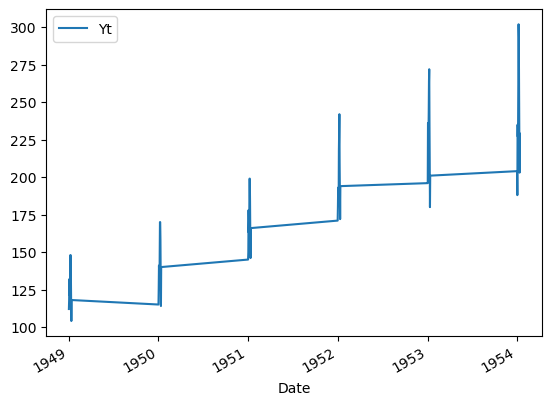

In [116]:
train.plot()

In [117]:
pmdarima.arima.nsdiffs(train['Yt'],m=12)

1

<AxesSubplot:xlabel='Date'>

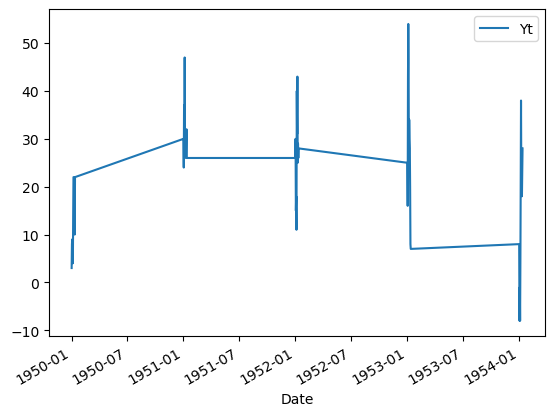

In [118]:
train_seasonal_diff=train.diff(12)
train_seasonal_diff=train_seasonal_diff.dropna()
train_seasonal_diff.plot()

In [119]:
pmdarima.arima.nsdiffs(train_seasonal_diff['Yt'],m=12)

0

In [120]:
adfuller(train_seasonal_diff)

(-3.5344948656579716,
 0.007144147364155518,
 0,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 362.00652022724046)

<AxesSubplot:xlabel='Date'>

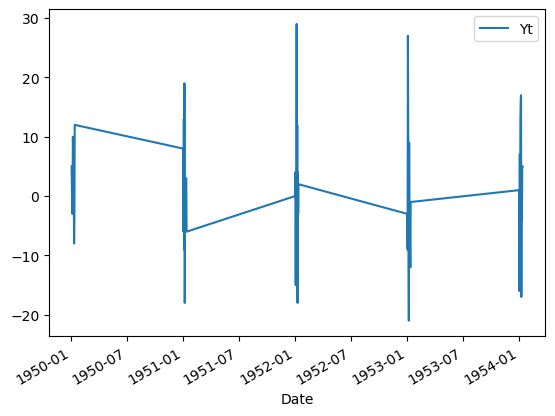

In [121]:
train_seasonal_first_diff=train_seasonal_diff.diff(1)
train_seasonal_first_diff=train_seasonal_first_diff.dropna()
train_seasonal_first_diff.plot()

In [122]:
adfuller(train_seasonal_first_diff)

(-6.061078678091793,
 1.212191723401962e-07,
 2,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 359.6756134597559)

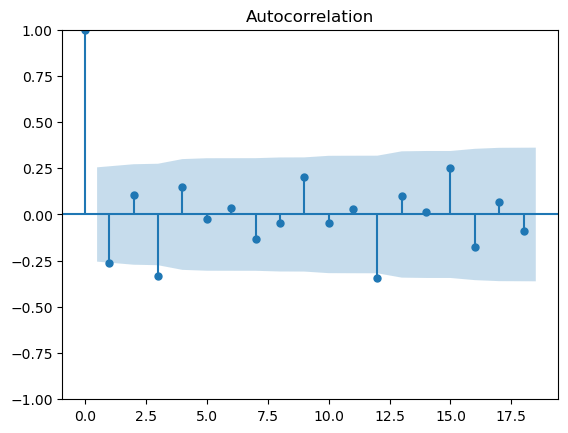

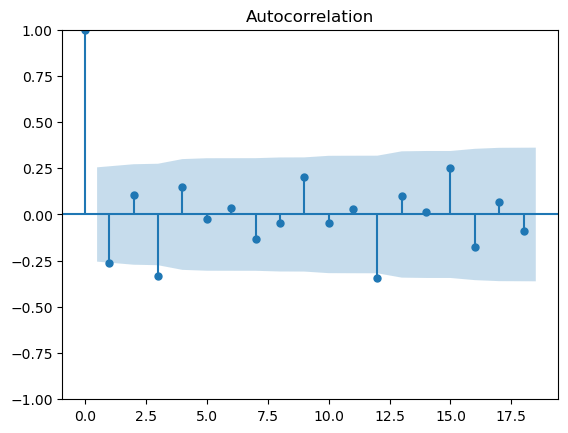

In [123]:
plot_acf(train_seasonal_first_diff)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


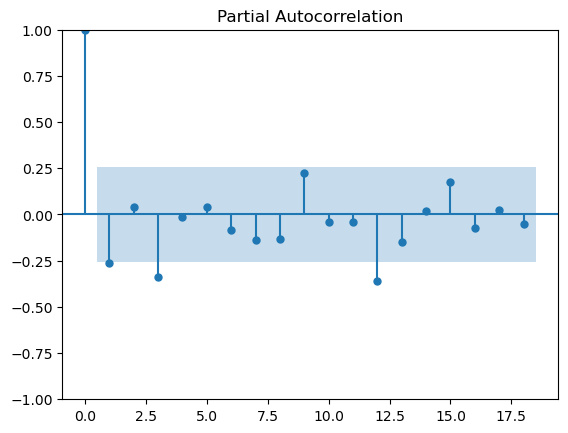

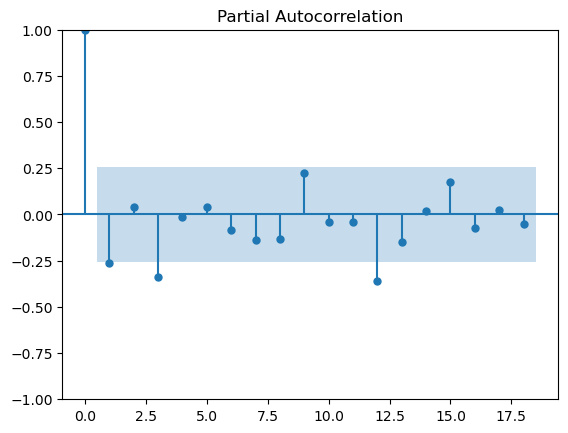

In [124]:
plot_pacf(train_seasonal_first_diff)

In [125]:
sarima = sm.tsa.statespace.SARIMAX(train,order=(0,1,1),seasonal_order=(0,1,1,12)).fit()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [126]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 Yt   No. Observations:                   72
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -215.969
Date:                            Sun, 05 Feb 2023   AIC                            437.938
Time:                                    21:10:51   BIC                            444.171
Sample:                                         0   HQIC                           440.371
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2524      0.114     -2.219      0.026      -0.475      -0.029
ma.S.L12      -0.3766      0.173     -2.181      0.029      -0.715      -0.038
sigma2        85.7049     15.693      5.461      0.000      54.947     116.463
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.12
Prob(Q):                              0.97   Prob(JB):                         0.35
Heteroskedasticity (H):               1.96   Skew:                             0.46
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
train.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 1949-01-01 to 1954-01-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Yt      72 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


In [128]:

auto_model = auto_arima(train,start_q=0,start_P=0,start_Q=0,m=12)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   72
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -216.299
Date:                            Sun, 05 Feb 2023   AIC                            440.597
Time:                                    21:10:56   BIC                            448.975
Sample:                                         0   HQIC                           443.874
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.8883      3.530      3.085      0.002       3.970      17.806
ar.L1          0.6648      0.109      6.104      0.000       0.451       0.878
ar.S.L12      -0.4049      0.144     -2.820      0.005      -0.686      -0.123
sigma2        75.6939     12.724      5.949      0.000      50.755     100.633
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.85
Prob(Q):                              0.36   Prob(JB):                         0.24
Heteroskedasticity (H):               1.54   Skew:                             0.38
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""